In [2]:
import numpy as np
import pandas as pd
import random
from communities.algorithms import louvain_method
from communities.visualization import draw_communities, louvain_animation

In [3]:
df_node = pd.read_csv("data/node.csv")
df_node = df_node.reset_index()
df_node.rename(columns={'org_id:ID':'id'},inplace=True)
df_relation = pd.read_csv("data/relation.csv")
df_relation.rename(columns={'actor_org_id:START_ID':'START_ID',
                            'repo_org_id:END_ID':'END_ID'},inplace=True)
df_node.head()

,index,id
0,0,10017763
1,1,1004228
2,2,10049283
3,3,1009716
4,4,10119367


In [4]:
tmp1 = df_node.copy()
tmp1.rename(columns={'index':'START_index','id':'START_ID'},inplace=True)
tmp2 = df_node.copy()
tmp2.rename(columns={'index':'END_index','id':'END_ID'},inplace=True)
df_relation = pd.merge(df_relation, tmp1, how='left', on='START_ID', sort=False)
df_relation = pd.merge(df_relation, tmp2, how='left', on='END_ID', sort=False)
df_relation.head()

,START_ID,END_ID,:TYPE,START_index,END_index
0,10017763,10161,PR,0,7
1,10017763,10767217,PR,0,28
2,10017763,1342004,PR,0,123
3,10017763,1421094,PR,0,154
4,10017763,1459110,PR,0,163


In [5]:
num = len(df_node)
adj_matrix = np.zeros((num,num))
#adj_matrix.shape

In [6]:
for index, row in df_relation.iterrows():
    START = row["START_index"]
    END = row["END_index"]
    #rd = random.randint(0,100)
    #if rd == 1:
    adj_matrix[START][END] = 1

In [7]:
communities, frames = louvain_method(adj_matrix)
#communities
#draw_communities(adj_matrix, communities)

C:\Users\16977\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][9]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
C:\Users\16977\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[1][9]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
C:\Users\16977\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][8]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
C:\Users\16977\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[1][8]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


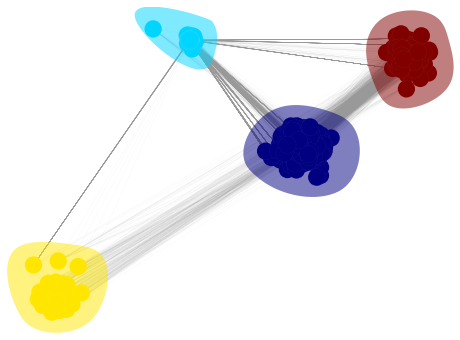

In [8]:
draw_communities(adj_matrix, communities)

In [9]:
len(communities)

4